#Astrononmy 19 Final Project

Group members: Sabi Abraham, April Ewers, Aditya Singh, Jaden Patrick Tanyao

Repository link: https://github.com/TechnoPangolin/ASTR-19-2-FINAL 
Submission document: https://docs.google.com/document/d/1SqOGh9XX9saNt5fEedSLPfw6TFOLC9DE/edit?usp=sharing&ouid=116023239842182664539&rtpof=true&sd=true

In [231]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [232]:
#open the file containing the data
fname = ("./55 Cnc RVC 274.txt")
f = open(fname, 'r')

#read the data and split it into lines
raw = f.read()
rawsplit = raw.split("\n")

#initialize an empty array of correct dimensions to hold the data
dataRVC = np.empty(shape=(3, 274), dtype='float')
#intialize counters
x = 0
y = 0

#read data into usable floats by taking apart each line and extracting the numbers
for a in rawsplit:
    #ignore the metadata and table header lines
    if a[0] != "\\" and a[0] != "|":
        #split apart the line on spaces
        b = a.split(" ")
        for c in b:
            #ignore all the lines containing only spaces or null
            if c != " " and c != "":
                #cast to float and assign the data to the correct array position  
                dataRVC[y, x] = float(c)
                #step the counter for this line
                y += 1
        #step the overall counter
        x += 1
        #reset the line counter
        y = 0

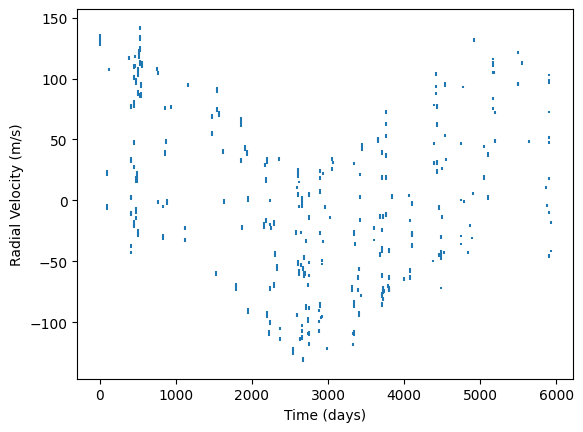

In [233]:
#Because the period values are so large
#Subtract from the initial value to have the calculation for simplified as the difference only matters 
time_full = dataRVC[0]
t0 = time_full.min()
dataRVC[0] = time_full - t0

#create figure and axes to plot to
fig, ax = plt.subplots()

#plot the data with error bars and no connecting lines for better clarity
ax.errorbar(dataRVC[0], dataRVC[1], yerr=dataRVC[2], fmt='none')

#label the axes
ax.set_ylabel("Radial Velocity (m/s)")
ax.set_xlabel("Time (days)")

#save the plot
plt.savefig("FinalFig_2_1.pdf", bbox_inches='tight', dpi=300, format='pdf')

In [234]:
#Oscillatory Function
#Describes how star's velocity should vary if it is being tugged by three planets
def multiPlanet_model (t, K1, P1, phi1, K2, P2, phi2, K3, P3, phi3, offset):
    return(
        K1 * np.sin(2 * np.pi * t / P1 + phi1) +
        K2 * np.sin(2 * np.pi * t / P2 + phi2) +
        K3 * np.sin(2 * np.pi * t / P3 + phi3) +
        offset
    )

In [235]:
from scipy.optimize import curve_fit
#Data Variable declaration 
t = dataRVC[0]
rv = dataRVC[1]
rv_err = dataRVC[2]

#Initial estimated guesses for the 3 planet fit based on the time v. rv plot 
K1_guess, P1_guess, phi1_guess = 70,14.5,0
K2_guess, P2_guess, phi2_guess = 10,44.0,0
K3_guess, P3_guess, phi3_guess = 50,4800.0,0
offset_guess = np.mean(rv)

#Combinding all guesses into one list for simplicity when plugging into curve_fit function
p0 = [
    K1_guess, P1_guess, phi1_guess,
    K2_guess, P2_guess, phi2_guess,
    K3_guess, P3_guess, phi3_guess,
    offset_guess
]

#Lower and upper bounds set to make the values more consistant with expected results 
lower_bounds = [
   50.0,10.0,-np.pi,   #K1 ≥ 50 m/s, P1 ≥ 10 d  
   5.0,30.0,-np.pi,   #K2 ≥ 5  m/s, P2 ≥ 30 d 
   30.0,4000.0,-np.pi,   #K3 ≥ 30 m/s, P3 ≥ 4000 
  -np.inf
]
upper_bounds = [
  100.0,20.0,np.pi,   #K1 ≤ 100 m/s, P1 ≤ 20 d
  20.0,60.0,np.pi,   #K2 ≤ 20  m/s, P2 ≤ 60 d
  100.0,10000.0,np.pi,   #K3 ≤ 100 m/s, P3 ≤10000 d
   np.inf
]

#Curve_fit function to give the fit values for K and P
popt, pcov = curve_fit(
   multiPlanet_model,
   t, rv,
   p0=p0,
   sigma=rv_err,
   absolute_sigma=True,
   bounds=(lower_bounds, upper_bounds),
   maxfev=30000
)

#Printing the best‐fit values to double check
param_names = [
   "K1 (m/s)","P1 (days)","phi1",
   "K2 (m/s)","P2 (days)","phi2",
   "K3 (m/s)","P3 (days)","phi3",
   "offset"
]
for name, val, err in zip(param_names, popt, np.sqrt(np.diag(pcov))):
   print(f"{name}: {val:.3f} ± {err:.3f}")


K1 (m/s): 50.000 ± 0.130
P1 (days): 14.498 ± 0.000
phi1: 0.219 ± 0.006
K2 (m/s): 8.059 ± 0.131
P2 (days): 44.231 ± 0.003
phi2: 1.418 ± 0.038
K3 (m/s): 53.667 ± 0.122
P3 (days): 5143.169 ± 10.717
phi3: 1.189 ± 0.010
offset: 0.331 ± 0.111


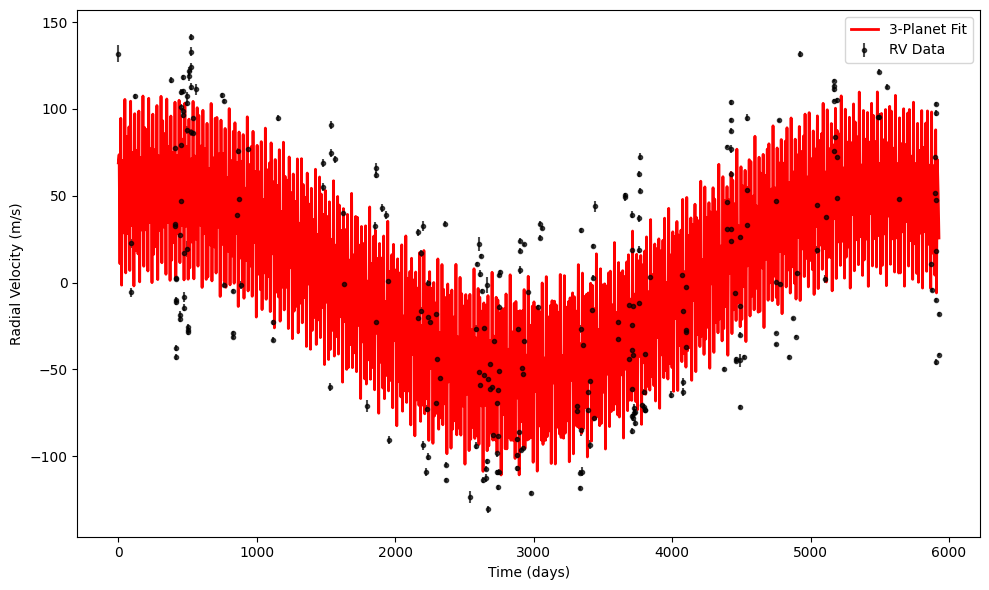

In [236]:
#Plotting the data 
fig, ax = plt.subplots(figsize=(10, 6))

#Error bars from previous graph for comparision
ax.errorbar(dataRVC[0], dataRVC[1], yerr=dataRVC[2], fmt='o', color='k', markersize=3, label='RV Data', alpha=0.7)

#Plot the fitted model
#Generate fine time points for a smooth model line
t_fine = np.linspace(min(dataRVC[0]), max(dataRVC[0]), 1000)
rv_fine = multiPlanet_model(t_fine, *popt)   #popt = best-fit params from curve

ax.plot(t_fine, rv_fine, 'r-', lw=2, label='3-Planet Fit')

#Label the axes
ax.set_xlabel("Time (days)")
ax.set_ylabel("Radial Velocity (m/s)")

ax.legend()
plt.tight_layout()

#Saveing graphj
plt.savefig("FinalFig_2_2.pdf", bbox_inches='tight', dpi=300, format='pdf')
plt.show()


In [237]:
#Finding the Residuals 

#Computing the residual 
residuals = dataRVC[1] - multiPlanet_model(dataRVC[0], *popt)

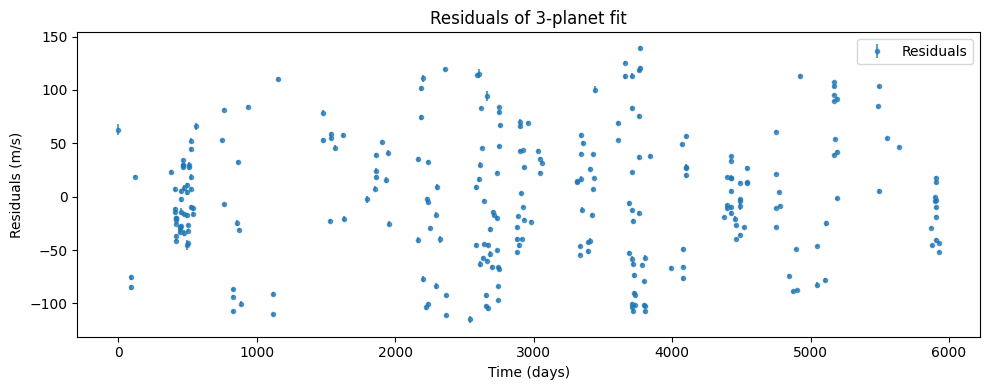

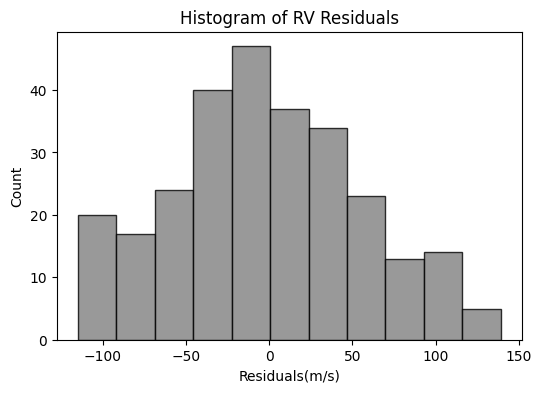

In [238]:
#Plot residual versus time 
fig, ax = plt.subplots(figsize=(10,4))

#Plotting with error bars 
ax.errorbar(dataRVC[0], residuals, yerr = dataRVC[2], fmt = 'o', color = 'tab:blue', markersize = 3, alpha = 0.7, label= 'Residuals')

#Axis labels 
ax.set_xlabel("Time (days)")
ax.set_ylabel("Residuals (m/s)")
ax.set_title("Residuals of 3-planet fit")

ax.legend()
plt.tight_layout()

#Saving the graph
plt.savefig("Residuals_vs._Time.pdf", bbox_inches = 'tight', dpi = 300, format = 'pdf')
plt.show()

#Histograph of the residuals 
fig, ax = plt.subplots(figsize = (6,4))

ax.hist(residuals, bins = 'auto', color = 'grey', edgecolor = 'black', alpha = 0.8)

ax.set_xlabel("Residuals(m/s)")
ax.set_ylabel("Count")
ax.set_title("Histogram of RV Residuals")

#Saving the residuals graph
plt.savefig("Residuals_Histogram.pdf", bbox_inches = 'tight', dpi = 300, format = 'pdf')
plt.show()

In [239]:
#Computing the std_deviations and mean quoted error
#Printing the data 
std_resid = np.std(residuals)
mean_sigma = np.mean(dataRVC[2])

print(f"Standard deviation of residuals: {std_resid:.3f} m/s")
print(f"Mean quoted measurment error:    {mean_sigma:.3f} m/s")

if std_resid > mean_sigma:
    print("Residual Scatter is larger than the average measurment error")
else:
    print("Residual scatter is comparable or smaller than the measurment error")

Standard deviation of residuals: 57.830 m/s
Mean quoted measurment error:    1.806 m/s
Residual Scatter is larger than the average measurment error


In [240]:
#Calculating Exo-planet mass 
'''
* some values are absolute value because mass can't be negetive
Current Data We Have 
K(m/s)_planet1 = 16.677
P(days)_planet1 = 15
K_planet2 = 9.395
P_planet2 = 45
K_planet3 = 50
P_planet3 = 4837 

M_star = 0.905 *from google*

Equation: Mass = (K / 28.4) * (P/365)^1/3 * (M_star)^2/3
'''
#Variables defined
M_star = 0.905
#Values taken from the Curve_fit function to get the fit values 
K1 = popt[0]
P1 = popt[1]
K2 = popt[3]
P2 = popt[4]
K3 = popt[6]
P3 = popt[7]

#Equations to calculate mass for 3 planets 
M1 = (K1 / 28.4) * (P1 / 365.0)**(1/3) * (M_star)**(2/3)
M2 = (K2 / 28.4) * (P2 / 365.0)**(1/3) * (M_star)**(2/3)
M3 = (K3 / 28.4) * (P3 / 365.0)**(1/3) * (M_star)**(2/3)

#5) Print the results:
print(f"Planet 1 (P1 = {P1:.3f} d, K1 = {K1:.3f} m/s):  M1 ≈ {M1:.4f} M_Jup")
print(f"Planet 2 (P2 = {P2:.3f} d, K2 = {K2:.3f} m/s):  M2 ≈ {M2:.4f} M_Jup")
print(f"Planet 3 (P3 = {P3:.3f} d, K3 = {K3:.3f} m/s):  M3 ≈ {M3:.4f} M_Jup")

#Name of planet
print(f"Planet 1 of mass {M1:.3f}, is the planet 55 Cancri B")
print(f"Planet 2 of mass {M2:.3f}, is the planet 55 Cancri C")
print(f"Planet 3 of mass {M3:.3f}, is the planet 55 Cancri D")

Planet 1 (P1 = 14.498 d, K1 = 50.000 m/s):  M1 ≈ 0.5620 M_Jup
Planet 2 (P2 = 44.231 d, K2 = 8.059 m/s):  M2 ≈ 0.1314 M_Jup
Planet 3 (P3 = 5143.169 d, K3 = 53.667 m/s):  M3 ≈ 4.2704 M_Jup
Planet 1 of mass 0.562, is the planet 55 Cancri B
Planet 2 of mass 0.131, is the planet 55 Cancri C
Planet 3 of mass 4.270, is the planet 55 Cancri D
